# Практикум 2.5
# Приближенное решение дифференциальных уравнений

## 1. Метод ломаных Эйлера.

### Упражнение 1.
Найти приближенное решение уравнения y' = f(x,y) удовлетворяющего начальному условию y(x0) = y0, на отрезке [a,b], (a = x0) методом ломаных Эйлера с заданной точностью e.
Порядок выполнения упражнения:

    1. Для отыскания приближенного решения создайте функцию. В качестве входных аргументов функции используйте: заданную в символьном виде функцию f(x,y); ее символьные аргументы x,y; координаты начальной точки x0,y0; координаты a и b концов отрезка, на котором ищется решение; начальное число отрезков разбиения n0, точность e. В качестве выходных аргументов функции используйте: массивы координат вершин ломаной Эйлера и число отрезков разбиения n, понадобившихся для по строения приближенного решения с заданной точностью.
    
Код функции должен включать:

    а) Последовательное вычисление координат вершин ломаной Эйлера для числа отрезков разбиения n0, 2*n0, 4*n0 и т.д. до тех пор, пока не будет достигнута точность e.
    
    б) Построение в графическом окне figure1 в одной системе координат трех ломаных Эйлера с числом звеньев, равным n0 ,2*n0 и n (полученных в результате первой, второй и последней итерации); ломаные должны быть изображены разными цветами

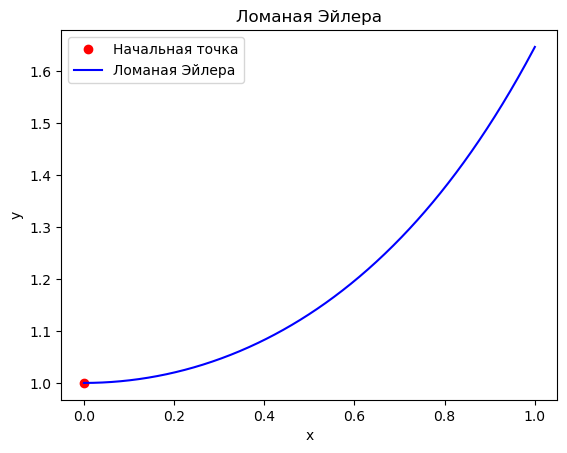

Координаты вершин ломаной Эйлера:
x0 = 0.000, y0 = 1.000
x1 = 0.002, y1 = 1.000
x2 = 0.003, y2 = 1.000
x3 = 0.005, y3 = 1.000
x4 = 0.006, y4 = 1.000
x5 = 0.008, y5 = 1.000
x6 = 0.009, y6 = 1.000
x7 = 0.011, y7 = 1.000
x8 = 0.012, y8 = 1.000
x9 = 0.014, y9 = 1.000
x10 = 0.016, y10 = 1.000
x11 = 0.017, y11 = 1.000
x12 = 0.019, y12 = 1.000
x13 = 0.020, y13 = 1.000
x14 = 0.022, y14 = 1.000
x15 = 0.023, y15 = 1.000
x16 = 0.025, y16 = 1.000
x17 = 0.027, y17 = 1.000
x18 = 0.028, y18 = 1.000
x19 = 0.030, y19 = 1.000
x20 = 0.031, y20 = 1.000
x21 = 0.033, y21 = 1.001
x22 = 0.034, y22 = 1.001
x23 = 0.036, y23 = 1.001
x24 = 0.038, y24 = 1.001
x25 = 0.039, y25 = 1.001
x26 = 0.041, y26 = 1.001
x27 = 0.042, y27 = 1.001
x28 = 0.044, y28 = 1.001
x29 = 0.045, y29 = 1.001
x30 = 0.047, y30 = 1.001
x31 = 0.048, y31 = 1.001
x32 = 0.050, y32 = 1.001
x33 = 0.052, y33 = 1.001
x34 = 0.053, y34 = 1.001
x35 = 0.055, y35 = 1.001
x36 = 0.056, y36 = 1.002
x37 = 0.058, y37 = 1.002
x38 = 0.059, y38 = 1.002
x39 = 0.061

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def euler_method(f, x0, y0, a, b, n0, e):
    # Вычисляем длину отрезка
    h = (b-a)/n0
    
    # Создаем массивы для хранения координат x и y
    x = np.zeros(n0+1)
    y = np.zeros(n0+1)
    
    # Задаем начальные значения
    x[0] = x0
    y[0] = y0
    
    # Вычисляем координаты вершин ломаной Эйлера
    for i in range(n0):
        xi = x[i]
        yi = y[i]
        xi1 = xi + h
        yi1 = yi + h*f(xi, yi)
        x[i+1] = xi1
        y[i+1] = yi1
    
    # Создаем массивы для хранения числа отрезков разбиения и точности
    n = np.array([n0])
    errors = np.array([0])
    
    # Повторяем вычисления, увеличивая число отрезков разбиения в два раза
    for i in range(1, 20):
        n_new = n0*2**i
        h = (b-a)/n_new
        x_new = np.zeros(n_new+1)
        y_new = np.zeros(n_new+1)
        x_new[0] = x0
        y_new[0] = y0
        
        # Вычисляем координаты вершин ломаной Эйлера для нового числа отрезков разбиения
        for j in range(n_new):
            xi = x_new[j]
            yi = y_new[j]
            xi1 = xi + h
            yi1 = yi + h*f(xi, yi)
            x_new[j+1] = xi1
            y_new[j+1] = yi1
        
        # Вычисляем ошибку
        error = np.max(np.abs(y_new[::2] - y[::]))
        
        # Если ошибка меньше заданной точности, то заканчиваем вычисления
        if error < e:
            break
        
        # Добавляем новые координаты и число отрезков разбиения в массивы
        x = x_new
        y = y_new
        n = np.append(n, n_new)
        errors = np.append(errors, error)
    
    # Создаем график ломаных Эйлера
    fig, ax = plt.subplots()
    ax.plot(x0, y0, 'ro', label='Начальная точка')
    ax.plot(x, y, 'b-', label='Ломаная Эйлера')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Ломаная Эйлера')
    ax.legend()
    plt.show()
    
    # Возвращаем массивы координат x и y, число отрезков разбиения n и ошибки
    return x, y, n, errors[-1]

def f(x, y):
    return x*y

x0 = 0
y0 = 1
a = 0
b = 1
n0 = 10
e = 0.001

x, y, n, error = euler_method(f, x0, y0, a, b, n0, e)

print('Координаты вершин ломаной Эйлера:')
for i in range(len(x)):
    print('x{} = {:.3f}, y{} = {:.3f}'.format(i, x[i], i, y[i]))
    
print('Число отрезков разбиения:', n[-1])
print('Ошибка:', error)

## 2. Метод последовательных приближений.
### Упражнение 2.

Найти приближенное решение уравнения y'=f(x,y), удовлетворяющего начальному условию y(x0) = y0, методом последовательных приближений Пикара.

Порядок выполнения упражнения:

    1. Для отыскания приближенного решения создайте функцию. В качестве входных аргументов функции используйте: заданную в символьном виде функцию f(x,y); ее символьные аргументыx x, y; координаты начальной точки x0, y0; число итераций n0. В качестве выходных аргументов функции используйте: массив приближенных решений, соответствующих 1-ой, 2-ой, ..., n0-ой итерации.
    Код функции должен включать:
        а) Последовательное отыскание приближенных решений с 1-ой по n0-ю итерацию.
        б) Построение в одной системе координат графиков приближенных решений, соответствующих 1-ой, 2-ой, ...,n0-ой итерации.

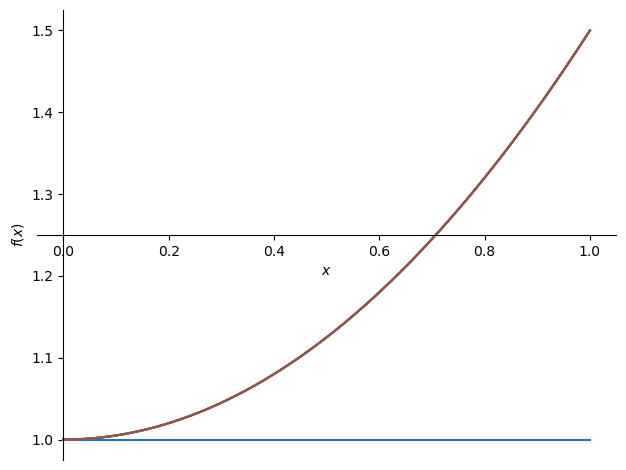

In [75]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from sympy.plotting import plot3d

x, y = sp.symbols('x y')

def picard_approx(f, x0, y0, n0):
    x = sp.symbols('x')
    y = sp.Function('y')(x)
    
    y_n = y0
    y_list = [y_n]
    
    for i in range(1, n0+1):
        y_n = y0 + sp.integrate(f.subs(y, y_n), (x, x0, x))
        y_list.append(y_n)
    
    return y_list

def plot_picard(y_list, y0, x_lim):
    p = plot(y_list[0], (x, x_lim[0], x_lim[1]), show=False)
    
    for i, f in enumerate(y_list):
        if not isinstance(f, int):
            p.append(plot(f.subs(y, y0), (x, x_lim[0], x_lim[1]), show=False)[0])

    p.show()
    

f = x*y
y_list = picard_approx(f, 0, 1, 5)
plot_picard(y_list, 1, [0, 1])

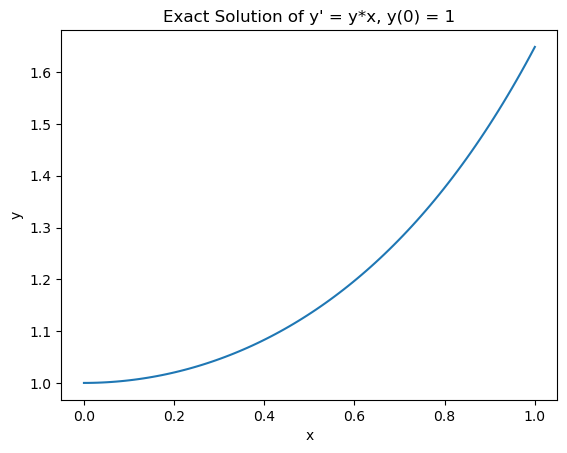

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def y_exact(x):
    return np.exp(x**2/2)

x = np.linspace(0, 1, 100)
y = y_exact(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Exact Solution of y' = y*x, y(0) = 1")
plt.show()

## 1) В чем состоит метод ломаных Эйлера?
это численный метод для решения обыкновенных дифференциальных уравнений (ОДУ) первого порядка. Он является упрощенной версией метода Эйлера, который использует ломаную линию вместо кривой, чтобы приблизить решение ОДУ. Метод ломаных Эйлера заключается в том, чтобы разбить интервал, на котором решается уравнение, на равные части и аппроксимировать решение на каждом отрезке ломаной линией, соединяющей начальную точку и точки, полученные при помощи метода Эйлера.

## 2) В чем состоит метод последовательных приближений?